# Autonomous CV Project

In this project, you will work on a computer vision task for autonomous driving. This project will guide you through the steps of preparing the data, building a deep learning model, training the model, and making predictions.

## Project Steps Overview:
1. **Data Preprocessing:** Load and preprocess the image data.
2. **Data Augmentation:** Apply augmentation techniques to increase the dataset variability.
3. **Model Building:** Define the CNN architecture using a deep learning framework.
4. **Model Training:** Train the CNN model with the prepared data.
5. **Prediction:** Use the trained model to make predictions on test data.

Let's get started! Provided below is some code to help you get set up with the data and imports.

### Importing Libraries
First, import the necessary libraries for data manipulation, visualization, and model building.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset
from PIL import Image, UnidentifiedImageError
import os
import numpy as np

### Loading the Dataset

Download and load the image dataset, and apply the necessary transformations. Make sure to adjust the path to your dataset.

In [2]:
# Define data transforms
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
import torchvision

In [4]:
train_dataset = torchvision.datasets.GTSRB(root = 'data', split = 'train', download = True, transform = data_transforms)

100%|██████████| 187490228/187490228 [00:48<00:00, 3845727.47it/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


In [5]:
# Use a smaller portion of the dataset
portion = 0.1   # Use 10% of the dataset for training and validation
total_size = len(train_dataset)
subset_size = int(portion * total_size)
indices = np.random.choice(total_size, subset_size, replace=False)

In [6]:
# Split the subset indices into training and validation sets
train_size = int(0.8 * subset_size)
val_size = subset_size - train_size
train_indices = indices[:train_size]
val_indices = indices[train_size:]

### Preparing Data for CNN
Create subsets for your train and validation data using the `Subset` from PyTorch, and then create the data loaders using PyTorch's `DataLoader`

In [7]:
trainset = DataLoader(torch.utils.data.Subset(train_dataset,train_indices), batch_size =64)

In [8]:
testset = DataLoader(torch.utils.data.Subset(train_dataset,val_indices), batch_size = 64)

# Model Building
Define the CNN model architecture:
1. **Define the model**: Create a class or function to define the CNN layers and architecture (hint: try using 3 convolutional layers, and play around with kernel_size and padding)
3. **Compile the model**: Initialize the model, specify the loss function, optimizer, and evaluation metrics.

In [9]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, padding =1, kernel_size = 3, stride = 1) #64x64
    self.conv2 = nn.Conv2d(16, 32, padding =1, kernel_size = 3, stride = 1) #32x32
    self.conv3 = nn.Conv2d(32, 64, padding =1, kernel_size = 3, stride = 1) #16x16
    self.dropout = nn.Dropout(0.25) #zeros 25% of the neurons
    self.fc1 = nn.Linear(64*16*16, 256)
    self.fc2 = nn.Linear(256,43)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2)
    x = self.dropout(x)
    x = torch.flatten(x,1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x

In [10]:
model = Net()

In [11]:
criterion = nn.CrossEntropyLoss()

In [12]:
optimizer = optim.Adam(model.parameters(), lr = 0.0005)

# Model Training
Train the CNN model with the prepared data:
1. **Implement the training loop**: Iterate over the training data, perform forward and backward passes, and update the model weights.
2. **Monitor the training**: Track the training loss and accuracy to ensure the model is learning.

In [13]:
epochs = 24
for epoch in range(epochs):
  running_loss = 0.0
  for images, labels in trainset:
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss +=loss.item()
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainset)}')

Epoch [1/24], Loss: 3.342953149010153
Epoch [2/24], Loss: 2.369108834687401
Epoch [3/24], Loss: 1.3905537654371822
Epoch [4/24], Loss: 0.8188665456631604
Epoch [5/24], Loss: 0.5411055780508939
Epoch [6/24], Loss: 0.3498208663042854
Epoch [7/24], Loss: 0.3352084681391716
Epoch [8/24], Loss: 0.22307424751274726
Epoch [9/24], Loss: 0.15265183534254045
Epoch [10/24], Loss: 0.11488672269179541
Epoch [11/24], Loss: 0.123393989770728
Epoch [12/24], Loss: 0.10081578462439425
Epoch [13/24], Loss: 0.11084228441776599
Epoch [14/24], Loss: 0.08992428551701938
Epoch [15/24], Loss: 0.10841901887975194
Epoch [16/24], Loss: 0.06597158534671455
Epoch [17/24], Loss: 0.07196423885248163
Epoch [18/24], Loss: 0.06115779332022237
Epoch [19/24], Loss: 0.03870158514473587
Epoch [20/24], Loss: 0.035611278356929475
Epoch [21/24], Loss: 0.017654877772335622
Epoch [22/24], Loss: 0.014386668458909672
Epoch [23/24], Loss: 0.01745650389827514
Epoch [24/24], Loss: 0.02562619507422342


# Prediction
Use the trained model to make predictions on test data:
1. **Implement the prediction function**: Use the trained model to generate predictions on the validation data (hint: you may need to loop over the images and labels provided in the `val_loader`)
2. **Evaluate the model's performance**: Calculate metrics like accuracy, precision, recall, etc., to assess the model's performance.
3. **Visualize the results**: Display the predicted vs actual labels to visually inspect the model's performance.
4. **Try predicting on an actual image**: Provide an image to the model to make a prediction

**Accuracy**

In [15]:
correct = 0
total = 0
preds = []
label = []
with torch.no_grad():
    for images, labels in testset:
        label += labels.tolist()
        preds += list(model(images).argmax(dim=1).numpy())
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on the test images: {:.2f}%'.format(100 * correct / total))

Accuracy of the model on the test images: 88.56%


**Visualization**

In [18]:
import matplotlib.pyplot as plt
preds = np.array(preds)
label = np.array(label)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [23]:
import pandas as pd
show = pd.DataFrame()

In [30]:
show['preds'] = preds
show['label'] = label
show

,preds,label
0,11,11
1,2,2
2,25,25
3,3,32
4,2,13
...,...,...
528,5,5
529,10,9
530,12,12
531,25,25


In [31]:
show[show['label']==show['preds']].count()

preds    473
label    473
dtype: int64

**Testing on real images** (1 correct and 1 incorrect example)

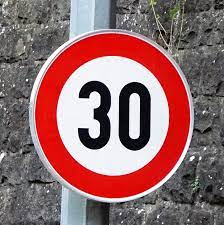

In [25]:
img = Image.open('/content/images (5).jfif')
img

In [26]:
img = data_transforms(img)
torch.argmax(model(img.view(-1,3,128,128)))

tensor(1)

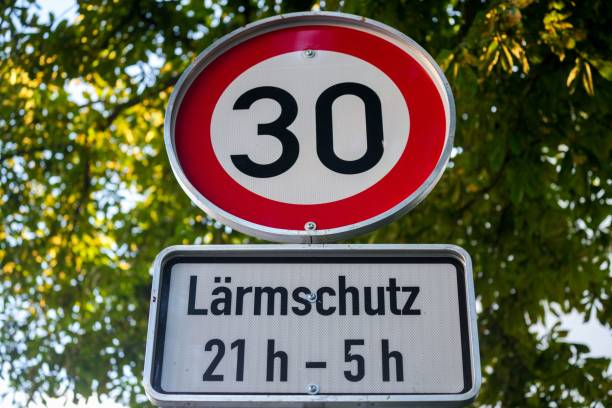

In [27]:
img1 = Image.open('/content/istockphoto-1446195943-612x612.jpg')
img1

In [28]:
img1 = data_transforms(img1)
torch.argmax(model(img1.view(-1,3,128,128)))

tensor(11)

**Visulization**